# A5: Solving nonlinear equations in 1d III

In [ ]:
# | code-fold: true

# useful definitions that we've used so far:

using Plots
using LaTeXStrings
using Polynomials
using PrettyTables

function simple_iteration( g, x1; N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        elseif (x[end] == Inf)
            @warn "simple iteration diverges to Inf";
            break
        elseif (x[end] == -Inf)
            @warn "simple iteration diverges to -Inf";
            break
        end 
    end
    return x
end

function relaxation( f, λ, x1; N=100, tol=1e-10)
    x = [x1]
    r = 0.;
    for n in 2:N
        push!( x, x[n-1] - λ*f(x[n-1]) )
        r = abs(f(x[end]));
        if (r < tol)
            return x
        end
    end
    @warn "max interations with |f| = $r";
    return x
end

function Newton( f, f_prime, x1; N=100, tol=1e-10)
    x = [x1]
    for n in 2:N
        push!( x, x[n-1] - f(x[n-1])/f_prime(x[n-1]) )
        r = abs(f(x[end]));
        if (r < tol)
            return x
        end
    end
    @warn "max interations |f| = $r";
    return x
end

function orderOfConvergence( x, ξ; α=0 )
    err = @. abs(x - ξ)
    logerr = @. log10( err )
    ratios = [NaN; [logerr[i+1] / logerr[i] for i in 1:length(logerr)-1]]
    if (α == 0) 
        α = ratios[end]
        αr = round(α, sigdigits=3)
    end
    mu = [NaN; [err[i+1] / err[i]^α for i in 1:length(err)-1]]
    pretty_table( 
         [1:length(x) err logerr ratios mu];
        column_labels = ["iteration", "absolute error", "log error", "alpha", "mu (α = $α)" ]
    )
end

function μ( x, ξ; α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

ϵ = 1.;
f = ψ -> ψ - ϵ * sin(ψ) - 2π; # has a zero at 2π
df = ψ -> 1 - ϵ * cos(ψ)
ξ = 2π

6.283185307179586

## B. Kepler's Equation

In lectures, we considered the equation 

\begin{align}
    f(\psi) := \psi - \epsilon \sin \psi - 2\pi = 0
\end{align}

with $\epsilon = 0.9$. Recall that we showed that the Relaxation Method ($x_{n+1} = x_n - \lambda f(x_n)$) converged linearly with asymptotic error constant $\left| 1 - 0.1 \lambda \right|$ and Newton's Method converged faster than quadratically. For the remainder of this question, fix $\epsilon = 1$. Here's a plot of $f$:

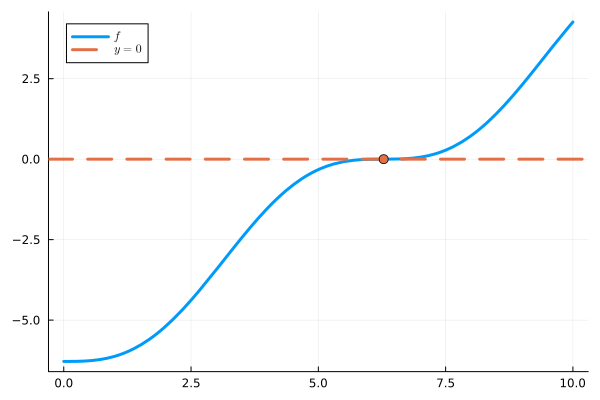

In [23]:
plot( f, 0, 10, label=L"f", lw=3 )
hline!( [0] , linestyle=:dash, lw = 3, label=L"y=0")
scatter!( [ξ], [f(ξ)], markersize=5, primary=false )

1. ✍ Show that $2\pi$ is the unique solution to $f = 0$.

<div class='alert alert-block alert-success'><b>Answer.</b> 

First notice that $f(2\pi) = 2\pi - \sin2\pi - 2\pi = 0$. We will use the fact that $| \sin x | < |x|$ for all $x \not= 0$. Using the fact that $\sin$ is $2\pi$-periodic, we have  

\begin{align}
    f(\psi) &= \psi - 2\pi - \sin(\psi - 2\pi). 
\end{align}

Therefore, for $\psi > 2\pi$, we have $f(\psi) > 0$ and, for $\psi < 2\pi$, we have $f(\psi) < 0$.

</div> 

2. 💻 Show numerically that the relaxation method converges for some choice of $\lambda$. What is the order of convergence of this method?

<div class='alert alert-block alert-success'><b>Answer.</b> 

Here is the the relaxation method applied to $f$ with $\lambda = 10$: that is $x_{n+1} = x_n - 10 f(x_n)$.
</div> 

In [36]:
x = relaxation(f, 10., 6.) 
orderOfConvergence( x, 2π; α=1  )

┌───────────┬────────────────┬───────────┬─────────┬────────────┐
│ iteration │ absolute error │ log error │   alpha │ mu (α = 1) │
├───────────┼────────────────┼───────────┼─────────┼────────────┤
│       1.0 │       0.283185 │ -0.547929 │     NaN │        NaN │
│       2.0 │       0.245487 │ -0.609971 │ 1.11323 │   0.866878 │
│       3.0 │       0.220905 │ -0.655795 │ 1.07512 │   0.899862 │
│       4.0 │       0.202982 │ -0.692543 │ 1.05603 │   0.918867 │
│       5.0 │       0.189072 │ -0.723373 │ 1.04452 │   0.931472 │
│       6.0 │       0.177827 │ -0.750002 │ 1.03681 │   0.940526 │
│       7.0 │        0.16847 │ -0.773478 │  1.0313 │   0.947379 │
│       8.0 │       0.160512 │ -0.794493 │ 1.02717 │   0.952764 │
│       9.0 │       0.153628 │ -0.813529 │ 1.02396 │   0.957115 │
│      10.0 │       0.147592 │ -0.830936 │  1.0214 │    0.96071 │
│      11.0 │        0.14224 │ -0.846979 │ 1.01931 │   0.963734 │
│      12.0 │       0.137448 │ -0.861861 │ 1.01757 │   0.966314 │
│      13.

┌ Warning: max interations with |f| = 2.5345819611999332e-5
└ @ Main In[22]:35


<div class='alert alert-block alert-success'>

This iteration seems to converge very slowly and the computed order of convergence seems to appoach $1$. However, since $\mu$ also approaches $1$, we have sub-linear convergence. </div> 

3. 💻 Show numerically that Newton's method converges. What is the order of convergence?

<div class='alert alert-block alert-success'><b>Answer.</b> 

Here is the code for Newton's method starting at $x_1 = 6$.
</div> 

In [40]:
y = Newton(f, df, 6.);
orderOfConvergence( y, 2π, α = 1) 

┌───────────┬────────────────┬───────────┬─────────┬────────────┐
│ iteration │ absolute error │ log error │   alpha │ mu (α = 1) │
├───────────┼────────────────┼───────────┼─────────┼────────────┤
│       1.0 │       0.283185 │ -0.547929 │     NaN │        NaN │
│       2.0 │       0.188537 │ -0.724603 │ 1.32244 │   0.665773 │
│       3.0 │       0.125617 │ -0.900952 │ 1.24337 │   0.666271 │
│       4.0 │      0.0837225 │  -1.07716 │ 1.19558 │   0.666491 │
│       5.0 │      0.0558085 │   -1.2533 │ 1.16352 │   0.666589 │
│       6.0 │      0.0372037 │  -1.42941 │ 1.14052 │   0.666632 │
│       7.0 │      0.0248019 │  -1.60551 │  1.1232 │   0.666651 │
│       8.0 │      0.0165344 │  -1.78161 │ 1.10968 │    0.66666 │
│       9.0 │      0.0110229 │   -1.9577 │ 1.09884 │   0.666664 │
│      10.0 │     0.00734859 │   -2.1338 │ 1.08995 │   0.666665 │
│      11.0 │     0.00489906 │  -2.30989 │ 1.08253 │   0.666666 │
│      12.0 │     0.00326604 │  -2.48598 │ 1.07623 │   0.666666 │
│      13.

<div class='alert alert-block alert-success'>

The iteration seems to converge linearly with asymptotic error constant $\mu = \frac{2}3$.
</div> 

4. ✍ Compare your answers to this question to the $\epsilon = 0.9$ case. Why is the convergence slower/faster?

<div class='alert alert-block alert-success'><b>Answer.</b> 

In lectures, we saw that, if $| g'(\xi) | < 1$, and $|x_1 - \xi|$ is sufficiently small then the simple iteration $x_{n+1} = g(x_n)$ converges at least linearly with asymptotic erorr constant $\mu = |g'(\xi)|$. We are considering $g(\psi) = \psi - \lambda f(\psi)$ with $f(\psi) = \psi - \epsilon \sin \psi - 2\pi$. We see that $|g'(2\pi)| = | 1 - \lambda( 1 - \epsilon) |$. Therefore, in the $\epsilon = 0.9$ case we have linear convergence whenever $|1 - 0.1 \lambda | < 1$. However, when $\epsilon = 1$, we get $|g'(2\pi)| = 1$ and sublinear convergence.

In lectures, we saw that if $f : [a,b] \to \mathbb R$ is twice continuously differentiable with $f(\xi) = 0$ and $f'(\xi) \not= 0$, then the Newton iteration converges at least quadratically to $\xi$ for all $x_1$ sufficiently close to $\xi$. We have $f'(2\pi) = 1 - \epsilon$ so $f'(2\pi) \not= 0$ when $\epsilon = 0.9$ but $f'(2\pi) = 0$ when $\epsilon = 1$. 

When $\epsilon = 1$, we have 

\begin{align}
    f'(\psi) &= 1 - \cos \psi \nonumber\\
    f''(\psi) &= \sin\psi \nonumber\\
    f'''(\psi) &= \cos\psi
\end{align}

This means that, for $\xi = 2\pi$, we have $f(\xi) = f'(\xi) = f''(\xi) = 0$ but $f'''(\xi) \not= 0$. In this case, there exists an interval $a< \xi < b$ and $m > 0$ such that $m < |f'''(x)| < 2m$ for all $x \in [a,b]$. Therefore, for $x_n \in [a,b]$, there exists $\eta_n, \theta_n$ between $x_n$ and $\xi$ for which 

\begin{align}
    &\left| x_{n+1} - \xi \right| = \left| x_n - \xi - \frac{f(x_n)}{f'(x_n)} \right|  \nonumber\\
    %
    &= \left| x_n - \xi - \frac{f(\xi) + f'(\xi)(x_n- \xi) + \frac12 f''(\xi) (x_n-\xi)^2 + \frac16 f'''(\eta_n) (x_n-\xi)^3}{f'(\xi) + f''(\xi) (x_n - \xi) + \frac12 f'''(\theta_n)(x_n-\xi)^2} \right| \nonumber\\
    %
    &= \left| 1 - \frac13\frac{f'''(\eta_n)}{f'''(\theta_n)} \right| \left| x_n- \xi \right| \nonumber\\
    %
    &\leq \frac56 |x_n - \xi| 
\end{align}

Here, we have used the fact that $\frac13 = 1 -\frac{1}3\frac{2m}{m} \leq 1-\frac{1}3\frac{f'''(\eta_n)}{f'''(\theta_n)} \leq 1- \frac{1}3\frac{m}{2m} = \frac56$. As a result, Newton's iteration starting in $[a,b]$ converges linearly with asymptotic error constant 

\begin{align}
    \mu = \lim_{n\to \infty} \frac{|x_{n+1} - \xi|}{|x_n - \xi|} = \left| 1 - \frac13\frac{f'''(\xi)}{f'''(\xi)} \right| = \frac23.
\end{align}

</div> 

<div class='alert alert-block alert-danger'><b>Remark.</b> 

In general, if $\xi$ is a root of $f$ of multiplicity $m$ and $f^{(m)}$ is continuous (and $f^{(m)}(\xi) \not=0$), then one can find an interval $[a,b]$ around $\xi$ for which Newton's iteration converges linearly to $\xi$ for all $x_1 \in [a,b]$ and the asymptotic error constant is $\mu = \frac{m-1}{m}$ (can you prove this?). 

</div> 

## D. Research Task

Find a research paper explaining a method named after one of the following people: Halley, Householder, Osada, Ostrowski, Steffensen, Traub. What is the main novelty of this method? How does it (claim to) improve upon previous methods in the literature? Implement your chosen method and test it on a function of your choice. 

Please clearly cite which paper you are describing.

<div class='alert alert-block alert-success'> 

There are many possible answers! Let me know if you want to present your answer to the rest of the class (see Syllabus for grading info).

Maybe we could also add some of the best answers to <a href="https://z.umn.edu/Math5485">https://z.umn.edu/Math5485</a>
</div> 